In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler



# Load and Parse Data

In [89]:
emg_data = pd.read_csv("../datasets/EMG/1_Rat.csv", skiprows=5)
emg_data = emg_data.drop(0)
# emg_data.reset_index(drop=True, inplace=True)

emg_data = emg_data.iloc[0::3, :]
emg_data = emg_data.iloc[5000:-5000, :]
emg_data.columns = [col.strip() for col in emg_data.columns]
emg_data = emg_data.astype("float64")
print(emg_data.head())
print(emg_data.columns)
# print(emg_data['EMG 1 time'])
# print(emg_data.iloc[:-500,:])

       EMG 1 Time Series (s)  EMG 1 (mV)  EMG 2 Time Series (s)  EMG 2 (mV)  \
15001                6.75000   -0.007217                6.75000    0.010910   
15004                6.75135   -0.013931                6.75135    0.012924   
15007                6.75270   -0.007050                6.75270    0.005203   
15010                6.75405   -0.005875                6.75405    0.005036   
15013                6.75540   -0.002518                6.75540    0.003861   

       EMG 3 Time Series (s)  EMG 3 (mV)  EMG 4 Time Series (s)  EMG 4 (mV)  \
15001                6.75000   -0.005539                6.75000   -0.010239   
15004                6.75135   -0.005539                6.75135   -0.006882   
15007                6.75270   -0.002853                6.75270   -0.009567   
15010                6.75405   -0.007217                6.75405   -0.002350   
15013                6.75540   -0.007553                6.75540   -0.007217   

       EMG 1 Time Series (s)  EMG 1 (mV).1  ...  E

/var/folders/tf/ny50dn9x7tz8mlg6fxcxw6s00000gn/T/ipykernel_26548/2798628076.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  emg_data = pd.read_csv("../datasets/EMG/1_Rat.csv", skiprows=5)


In [90]:
emg_data['EMG 1 Time Series (s).1']

15001      6.75000
15004      6.75135
15007      6.75270
15010      6.75405
15013      6.75540
            ...   
129406    58.23225
129409    58.23360
129412    58.23495
129415    58.23630
129418    58.23765
Name: EMG 1 Time Series (s).1, Length: 38140, dtype: float64

# Visualize

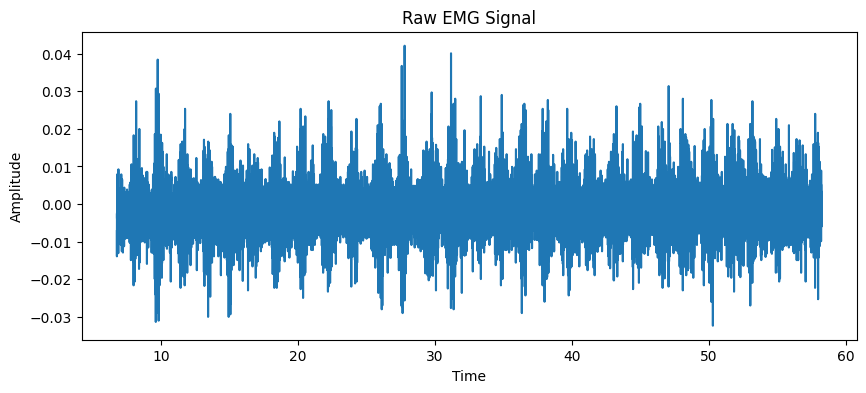

In [91]:

plt.figure(figsize=(10, 4))
plt.plot(emg_data['EMG 1 Time Series (s).1'], emg_data['EMG 1 (mV)'])
plt.title('Raw EMG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()



# Filters - Apply a Butterworth filter

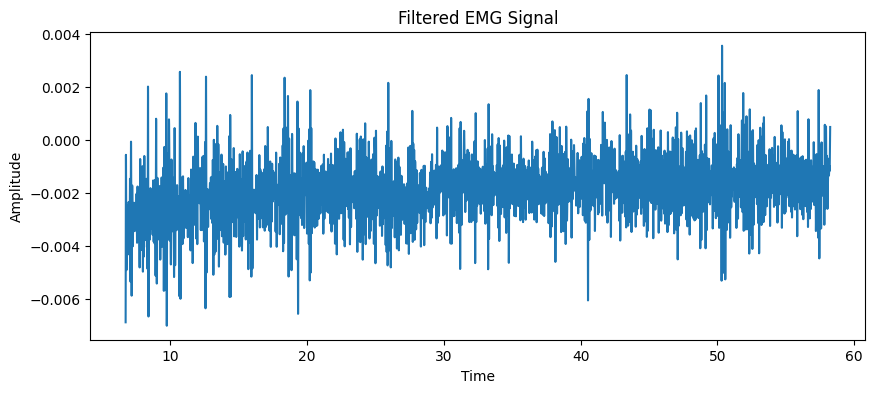

In [92]:
# Filters - Apply a Butterworth filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

fs = 2222  # Sample rate
cutoff = 50  # Desired cutoff frequency of the filter, Hz
filtered = butter_lowpass_filter(emg_data['EMG 1 (mV)'], cutoff, fs)

plt.figure(figsize=(10, 4))
plt.plot(emg_data['EMG 1 Time Series (s).1'], filtered)
plt.title('Filtered EMG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


# Normalizers

In [94]:
# Normalizers
scaler = StandardScaler()
filtered = scaler.fit_transform([filtered])


# Plot

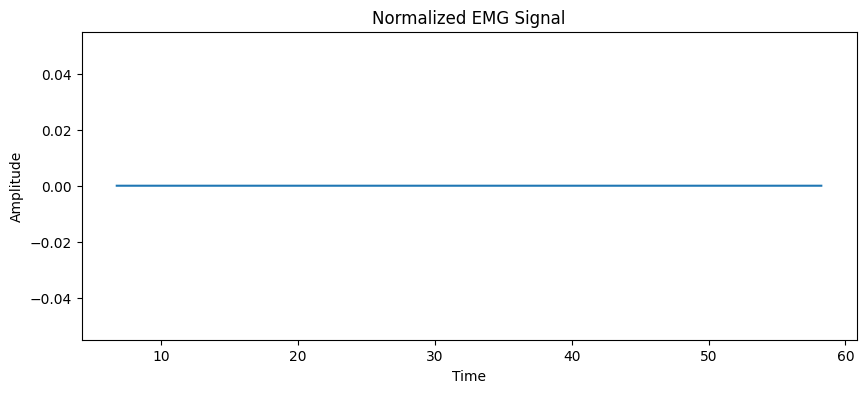

In [99]:
plt.figure(figsize=(10, 4))
plt.plot(emg_data['EMG 1 Time Series (s).1'], filtered[0].T)
plt.title('Normalized EMG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()